<h2>📊 Project Overview: Telco Customer Churn Analysis (EDA Phase)</h2>
<p>
This notebook represents the <strong>exploratory data analysis (EDA)</strong> stage of a broader machine learning project using the <a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn" target="_blank">Telco Customer Churn dataset</a>. The overall goal of the project is to build and deploy a predictive model that can help identify customers likely to churn.
</p>
<p>
In this initial phase, we explore the dataset to understand its structure, clean and preprocess the data, and analyze relationships between key features and the churn variable. We use visualizations and statistical techniques to uncover trends and insights that will inform the modeling process in later stages.
</p>
<p>
Some of the aspects examined include service subscriptions, account tenure, and financial metrics. We also conduct basic statistical testing and early logistic regression modeling to understand potential predictors.
</p>
<p>
<strong>Next Steps:</strong> Based on the findings from this EDA, we will proceed to build and evaluate machine learning models aimed at predicting customer churn. These models will ultimately be deployed as part of a solution to support customer retention strategies.
</p>

<h2>🔧 Importing Libraries</h2>
<p>We begin by importing essential Python libraries required for this analysis. These include tools for data handling (<code>pandas</code>, <code>numpy</code>), visualization (<code>matplotlib</code>, <code>seaborn</code>), and statistical analysis (<code>scipy</code>).</p>

In [2]:
# Dataset Access (Kaggle)
import kagglehub

# Data Handling
import pandas as pd
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy.stats import chi2_contingency, mannwhitneyu, chi2

# Modeling
import statsmodels.formula.api as smf

c:\Users\marin\Desktop\AI-ML Education\telco_customer_churn\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h2>📥 Importing the Dataset</h2>
<p>The dataset used for this project is sourced from Kaggle's <a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn" target="_blank">Telco Customer Churn</a>. It contains various customer details and whether or not they have churned. Here, we load the dataset into a pandas DataFrame for analysis.</p>

In [3]:
# Download the dataset
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

# Load CSV into pandas DataFrame
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
df = pd.read_csv(os.path.join(path, csv_file))

# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h2>🧹 Data Cleaning and Initial Exploration</h2>
<p>
Before starting the analysis, we inspect the structure of the dataset and perform basic cleaning. This includes checking the number of entries, data types, missing values, and the distribution of the target variable <code>Churn</code>.
</p>
<p>
We find that the <code>TotalCharges</code> column is stored as an object type due to some non-numeric values. We convert it to a numeric format and drop rows where conversion fails. This reduces the dataset from 7043 to 7032 valid entries.
</p>
<p>
We also visualize numerical features — <code>tenure</code>, <code>MonthlyCharges</code>, and <code>TotalCharges</code> — using box plots to check for outliers. The distributions appear reasonable, and we don’t observe any extreme outliers that require handling.
</p>
<p>
With a clean and consistent dataset, we're ready to move on to the exploratory data analysis.
</p>

In [4]:
# Basic info about the dataset
df.info()

# Check unique values in Churn column
df['Churn'].value_counts(normalize=True)  # Proportion of churned vs non-churned customers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [5]:
# Convert to numeric and remove null values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df[df['TotalCharges'].notnull()]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

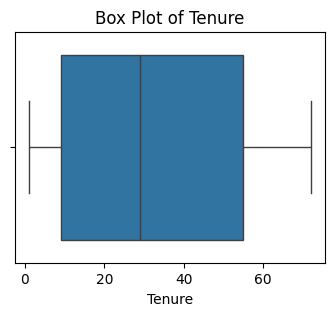

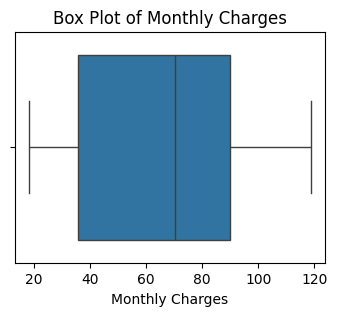

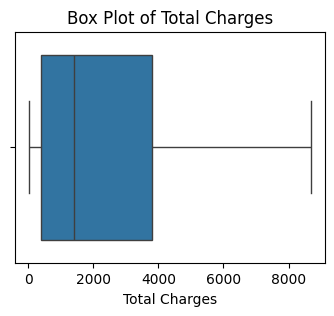

In [7]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['tenure'])
plt.title('Box Plot of Tenure')
plt.xlabel('Tenure')
plt.show()
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Box Plot of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.show()
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['TotalCharges'])
plt.title('Box Plot of Total Charges')
plt.xlabel('Total Charges')
plt.show()

<h2>🚻 Gender and Churn</h2>
<p>
In this section, we examine whether customer churn is related to gender. We begin by visualizing the churn distribution for male and female customers. The results show very similar churn rates: <strong>26.20%</strong> for males and <strong>26.96%</strong> for females.
</p>
<p>
To check for a statistically significant relationship, we perform a Chi-Square test between <code>gender</code> and <code>churn</code>. The p-value is <code>0.4905</code>, so we fail to reject the null hypothesis — gender is not significantly associated with churn.
</p>
<p>
Next, we analyze whether gender is related to other features in the dataset. For numerical features, we use the <strong>Mann-Whitney U test</strong>, which does not assume normality. For categorical features, we continue with Chi-Square tests.
</p>
<p>
None of the tests return significant results. Gender does not show meaningful differences across other features, suggesting that it is not a useful predictor in this dataset.
</p>
<p>
<strong>Conclusion:</strong> Gender does not significantly impact churn or relate to other key variables. It can likely be excluded from future modeling efforts.
</p>

In [8]:
# Check unique values
print(df['gender'].unique())
print(df['gender'].value_counts())

['Female' 'Male']
gender
Male      3549
Female    3483
Name: count, dtype: int64


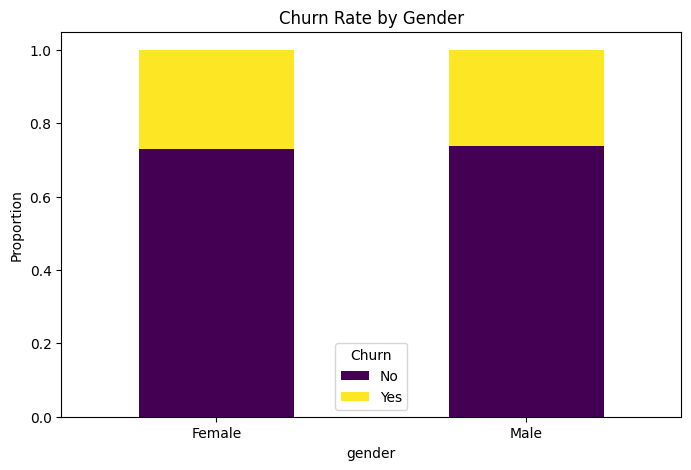

Churn,No,Yes
gender,,
Female,0.730405,0.269595
Male,0.737954,0.262046


In [9]:
# Calculate churn rate by gender
gender_churn = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()

# Visualize
gender_churn.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.title("Churn Rate by Gender")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="Churn")
plt.show()

# Print numerical values
gender_churn

In [10]:
# Create contingency table
contingency_table = pd.crosstab(df["gender"], df["Churn"])

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between gender and Churn.")
else:
    print("Fail to reject the null hypothesis: No strong evidence of a relationship.")


Chi-Square Statistic: 0.4755
P-Value: 0.4905
Fail to reject the null hypothesis: No strong evidence of a relationship.


In [11]:
# Separate numerical and categorical features
num_features = df.select_dtypes(include=np.number).columns
cat_features = df.select_dtypes(include=['object']).columns.drop('gender')

# 1️⃣ Gender vs Numerical Features (Mann-Whitney U Test)
mw_results = {}
for col in num_features:
    male_vals = df[df['gender'] == 'Male'][col].dropna()
    female_vals = df[df['gender'] == 'Female'][col].dropna()
    
    # Mann-Whitney U test (non-parametric)
    stat, p_val = mannwhitneyu(male_vals, female_vals, alternative='two-sided')
    mw_results[col] = p_val

# Convert to DataFrame
mw_results_df = pd.DataFrame.from_dict(mw_results, orient='index', columns=['p_value'])
mw_results_df['Significant'] = mw_results_df['p_value'] < 0.05
print("\nMann-Whitney U Test Results (Gender vs Numerical Features):")
print(mw_results_df)

# 2️⃣ Gender vs Categorical Features (Chi-Square Test)
chi2_results = {}
for col in cat_features:
    contingency_table = pd.crosstab(df['gender'], df[col])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[col] = p

# Convert to DataFrame
chi2_results_df = pd.DataFrame.from_dict(chi2_results, orient='index', columns=['p_value'])
chi2_results_df['Significant'] = chi2_results_df['p_value'] < 0.05
print("\nChi-Square Test Results (Gender vs Categorical Features):")
print(chi2_results_df)


Mann-Whitney U Test Results (Gender vs Numerical Features):
                 p_value  Significant
SeniorCitizen   0.878754        False
tenure          0.755217        False
MonthlyCharges  0.272573        False
TotalCharges    0.921357        False

Chi-Square Test Results (Gender vs Categorical Features):
                   p_value  Significant
customerID        0.494393        False
Partner           0.926875        False
Dependents        0.399918        False
PhoneService      0.555302        False
MultipleLines     0.687979        False
InternetService   0.643278        False
OnlineSecurity    0.390927        False
OnlineBackup      0.547187        False
DeviceProtection  0.920123        False
TechSupport       0.764448        False
StreamingTV       0.825265        False
StreamingMovies   0.697545        False
Contract          0.803665        False
PaperlessBilling  0.330163        False
PaymentMethod     0.500297        False
Churn             0.490488        False


<h2>📋 Categorical Features vs Churn</h2>
<p>
In this section, we perform a statistical test to check whether each categorical feature is significantly associated with the target variable <code>Churn</code>. We use the <strong>Chi-Square test of independence</strong> for this purpose.
</p>
<p>
All categorical features are tested at a 5% significance level. If the p-value is less than 0.05, we consider the feature to be <strong>statistically related to churn</strong> and potentially useful for modeling. Otherwise, we mark it as not significantly related.
</p>
<p>
We include <code>SeniorCitizen</code> in this analysis as it behaves like a categorical variable (0 or 1). The <code>customerID</code> and <code>Churn</code> columns are excluded from testing.
</p>
<p>
Based on the test results, we conclude that <strong><code>gender</code></strong> and <strong><code>PhoneService</code></strong> are not statistically related to churn and are unlikely to be useful features for predictive modeling.
</p>

In [47]:
from scipy.stats import chi2_contingency

# Define categorical features to test (excluding customerID and Churn)
categorical_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Store results
chi2_summary = []

# Perform Chi-Square test for each feature
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Churn'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
    chi2_summary.append({
        "Feature": feature,
        "P-Value": p_val,
        "Statistically Relevant (p < 0.05)": p_val < 0.05
    })

# Create DataFrame
chi2_results_df = pd.DataFrame(chi2_summary)
chi2_results_df = chi2_results_df.sort_values(by="P-Value")

# Format p-values for display only (not affecting the actual value)
chi2_results_df["P-Value"] = chi2_results_df["P-Value"].apply(lambda x: f"{x:.4f}")

# Display
print("Chi-Square Test Results (Categorical Features vs Churn):")
display(chi2_results_df)

Chi-Square Test Results (Categorical Features vs Churn):


,Feature,P-Value,Statistically Relevant (p < 0.05)
13,Contract,0.0000,True
7,OnlineSecurity,0.0000,True
10,TechSupport,0.0000,True
6,InternetService,0.0000,True
15,PaymentMethod,0.0000,True
8,OnlineBackup,0.0000,True
9,DeviceProtection,0.0000,True
12,StreamingMovies,0.0000,True
11,StreamingTV,0.0000,True
14,PaperlessBilling,0.0000,True


<h2>👴 Senior Citizen Status and Churn</h2>
<p>
We analyze whether being a senior citizen affects the likelihood of customer churn. The <code>SeniorCitizen</code> feature is a binary indicator (0 = Not Senior, 1 = Senior), allowing us to compare churn behavior across age groups.
</p>
<p>
The churn rate for senior customers is <strong>41.68%</strong>, significantly higher than the <strong>23.65%</strong> churn rate for non-seniors. This difference is also clearly visible in the bar chart.
</p>
<p>
To statistically confirm this relationship, we run a Chi-Square test. The resulting p-value is <code>0.0000</code>, which leads us to reject the null hypothesis and conclude that churn is significantly related to senior status.
</p>
<p>
This means senior citizens are more likely to churn, making <code>SeniorCitizen</code> a strong indicator to consider in churn prediction models.
</p>

In [13]:
# Check unique values
print(df['SeniorCitizen'].unique())
print(df['SeniorCitizen'].value_counts())

[0 1]
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64


In [14]:
# Churn rate among seniors and non-seniors
churn_rate_seniors = df[df['SeniorCitizen'] == 1]['Churn'].value_counts(normalize=True)['Yes']
churn_rate_non_seniors = df[df['SeniorCitizen'] == 0]['Churn'].value_counts(normalize=True)['Yes']

print(f"Churn Rate for Seniors: {churn_rate_seniors * 100:.2f}%")
print(f"Churn Rate for Non-Seniors: {churn_rate_non_seniors * 100:.2f}%")

Churn Rate for Seniors: 41.68%
Churn Rate for Non-Seniors: 23.65%


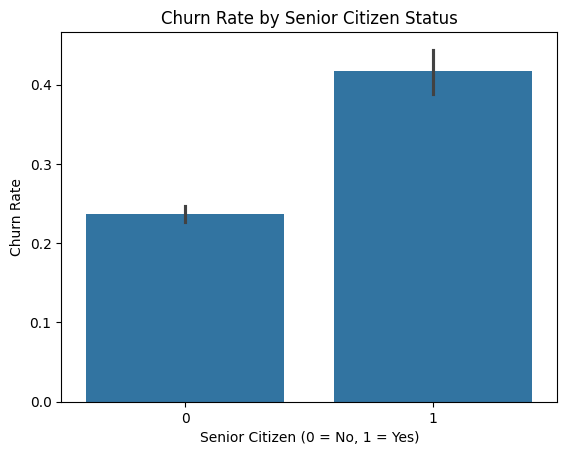

In [15]:
sns.barplot(data=df, x="SeniorCitizen", y=df["Churn"].apply(lambda x: 1 if x == "Yes" else 0))
plt.title("Churn Rate by Senior Citizen Status")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Churn Rate")
plt.show()

In [16]:
# Create contingency table
contingency_table = pd.crosstab(df["SeniorCitizen"], df["Churn"])

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Senior status and Churn.")
else:
    print("Fail to reject the null hypothesis: No strong evidence of a relationship.")


Chi-Square Statistic: 158.4408
P-Value: 0.0000
Reject the null hypothesis: There is a significant relationship between Senior status and Churn.


<h2>💑 Partner Status and Churn</h2>
<p>
We explore whether having a partner impacts a customer's likelihood of churning. The churn rate is calculated separately for customers with and without partners, and we visualize the difference using a bar chart.
</p>
<p>
The results show a noticeable difference: customers without partners have a churn rate of <strong>32.98%</strong>, while those with partners have a much lower rate of <strong>19.72%</strong>. This suggests that partner status may be strongly related to customer retention.
</p>
<p>
To confirm this relationship statistically, we perform a Chi-Square test. The test returns a p-value of <code>0.0000</code>, allowing us to reject the null hypothesis and conclude that churn is significantly related to partner status.
</p>
<p>
Overall, customers with partners are less likely to churn. One possible explanation is that people in relationships may be part of shared or family plans, making them less likely to switch providers due to added complexity.
</p>

In [17]:
# Check unique values
print(df['Partner'].unique())
print(df['Partner'].value_counts())

['Yes' 'No']
Partner
No     3639
Yes    3393
Name: count, dtype: int64


Churn Rate for engaged people: 19.72%
Churn Rate for open people: 32.98%


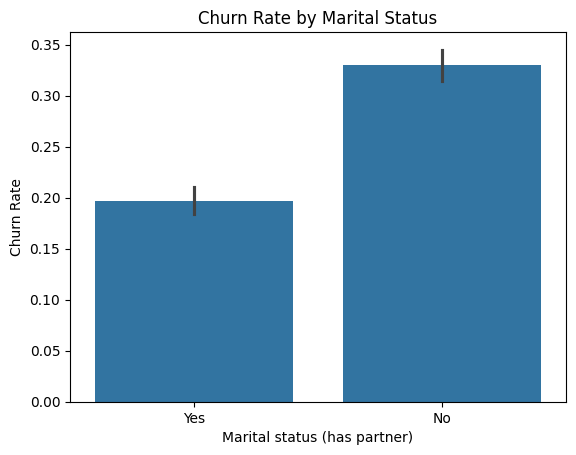

In [18]:
# Churn rate among seniors and non-seniors
churn_rate_engaged = df[df['Partner'] == "Yes"]['Churn'].value_counts(normalize=True)['Yes']
churn_rate_non_open = df[df['Partner'] == "No"]['Churn'].value_counts(normalize=True)['Yes']

print(f"Churn Rate for engaged people: {churn_rate_engaged * 100:.2f}%")
print(f"Churn Rate for open people: {churn_rate_non_open * 100:.2f}%")

sns.barplot(data=df, x="Partner", y=df["Churn"].apply(lambda x: 1 if x == "Yes" else 0))
plt.title("Churn Rate by Marital Status")
plt.xlabel("Marital status (has partner)")
plt.ylabel("Churn Rate")
plt.show()

In [19]:
# Create contingency table
contingency_table = pd.crosstab(df["Partner"], df["Churn"])

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Marital status and Churn.")
else:
    print("Fail to reject the null hypothesis: No strong evidence of a relationship.")


Chi-Square Statistic: 157.5032
P-Value: 0.0000
Reject the null hypothesis: There is a significant relationship between Marital status and Churn.


<h2>👨‍👩‍👧 Dependents and Churn</h2>
<p>
In this section, we examine whether having dependents affects a customer's likelihood of churning. We use a Chi-Square test to check if there is a statistically significant relationship between the <code>Dependents</code> feature and <code>Churn</code>.
</p>
<p>
The test results show a very small p-value, allowing us to reject the null hypothesis. This means that churn behavior is significantly different between customers with and without dependents.
</p>
<p>
From the data, we observe that customers with dependents are less likely to churn. A possible reason could be that customers with families might be on shared or bundled plans, making switching providers more complicated or disruptive.
</p>

In [20]:
# Check unique values
print(df['Dependents'].unique())
print(df['Dependents'].value_counts())

['No' 'Yes']
Dependents
No     4933
Yes    2099
Name: count, dtype: int64


Churn Rate for people with dependents: 15.53%
Churn Rate for people with dependents: 31.28%


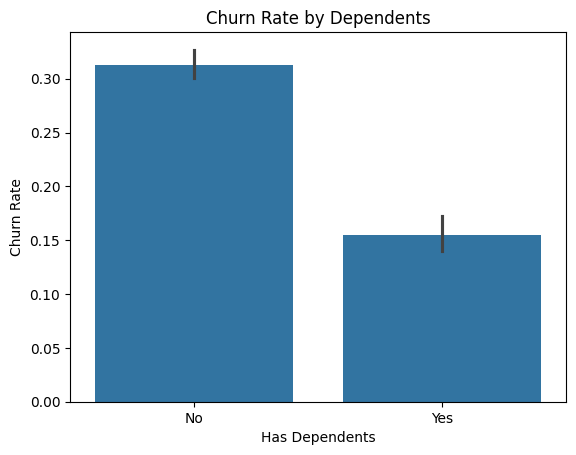

In [21]:
# Churn rate among seniors and non-seniors
churn_rate_dependents = df[df['Dependents'] == "Yes"]['Churn'].value_counts(normalize=True)['Yes']
churn_rate_no_dependents = df[df['Dependents'] == "No"]['Churn'].value_counts(normalize=True)['Yes']

print(f"Churn Rate for people with dependents: {churn_rate_dependents * 100:.2f}%")
print(f"Churn Rate for people with dependents: {churn_rate_no_dependents * 100:.2f}%")

sns.barplot(data=df, x="Dependents", y=df["Churn"].apply(lambda x: 1 if x == "Yes" else 0))
plt.title("Churn Rate by Dependents")
plt.xlabel("Has Dependents")
plt.ylabel("Churn Rate")
plt.show()

In [22]:
# Create contingency table
contingency_table = pd.crosstab(df["Dependents"], df["Churn"])

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Dependents and Churn.")
else:
    print("Fail to reject the null hypothesis: No strong evidence of a relationship.")


Chi-Square Statistic: 186.3216
P-Value: 0.0000
Reject the null hypothesis: There is a significant relationship between Dependents and Churn.


<h3>📆 Tenure</h3>
<p>
We analyze the <code>tenure</code> feature, which represents how long a customer has been with the company (in months). First, we explore the distribution using a histogram and a box plot to understand how tenure is spread across the customer base.
</p>
<p>
Next, we calculate the churn rate for each tenure value to see how customer loyalty over time relates to churn. The resulting bar chart shows a clear trend — as tenure increases, the churn rate decreases.
</p>
<p>
This strong inverse relationship suggests that customers who have been with the company longer are significantly less likely to churn. Therefore, tenure is likely to be a strong predictor in our future churn model.
</p>

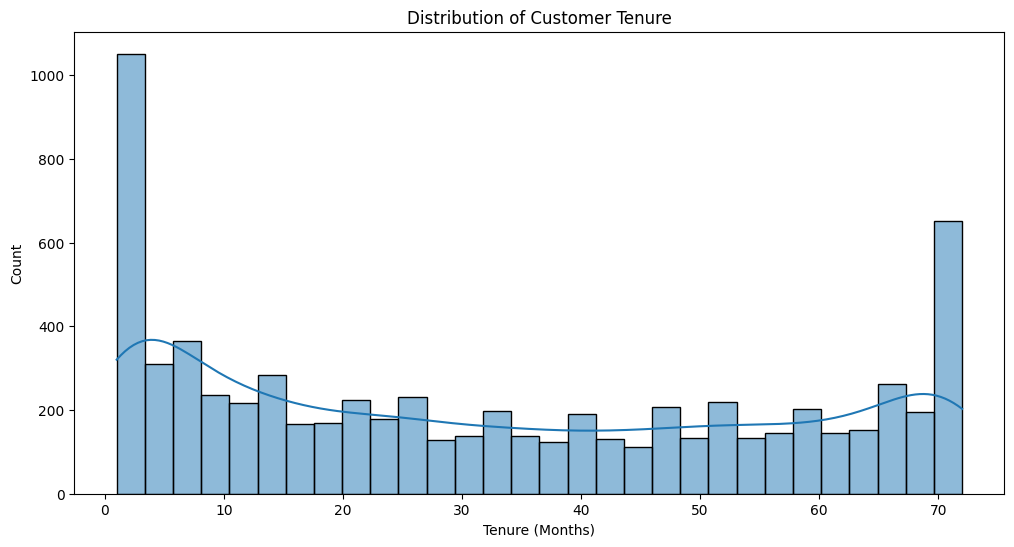

In [23]:
# Bar chart for tenure distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

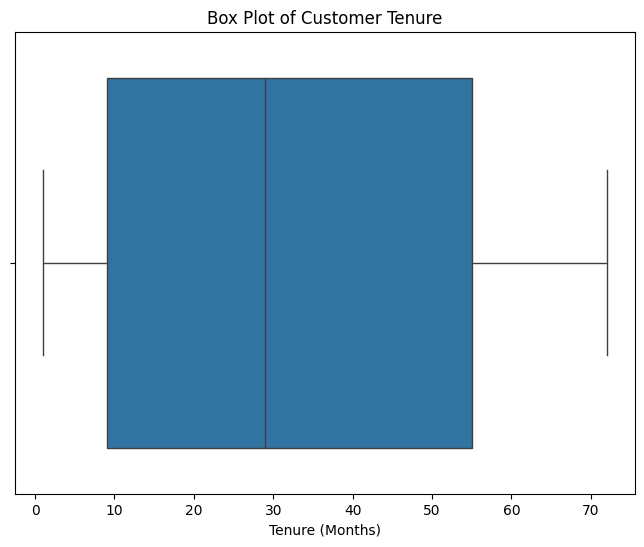

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['tenure'])
plt.title('Box Plot of Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.show()

C:\Users\marin\AppData\Local\Temp\ipykernel_1824\2178436056.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tenure_churn, x='tenure', y='churn_rate', palette='coolwarm')


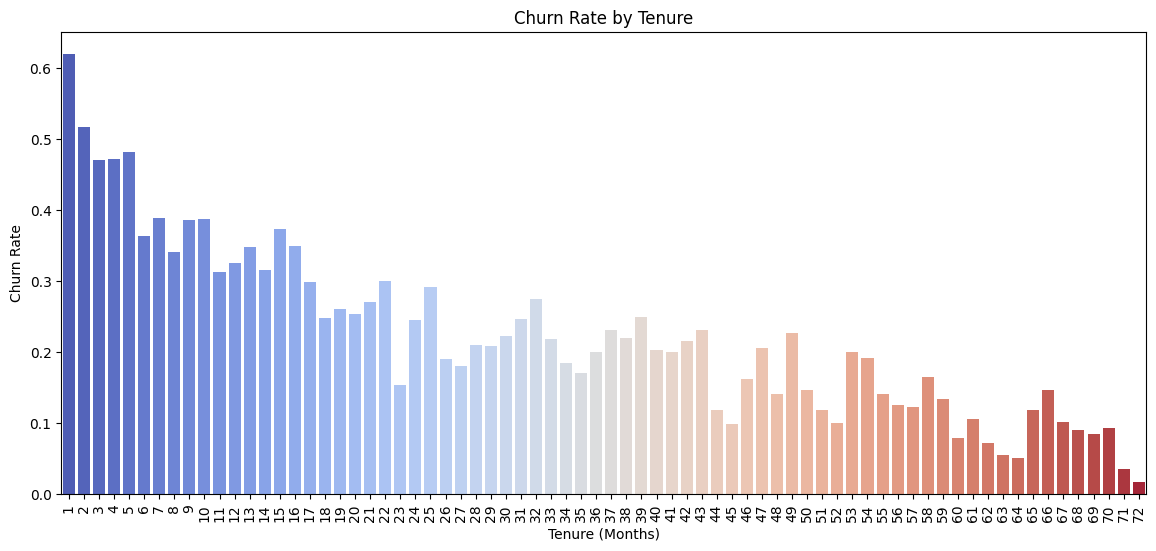

In [25]:
# Convert Churn to binary
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Group by tenure
tenure_churn = df.groupby('tenure')['Churn_binary'].agg(['mean', 'count']).reset_index()
tenure_churn.columns = ['tenure', 'churn_rate', 'customer_count']

# Plot churn rate by tenure
plt.figure(figsize=(14, 6))
sns.barplot(data=tenure_churn, x='tenure', y='churn_rate', palette='coolwarm')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=90)
plt.show()


<h2>💰 Monthly Charges</h2>
<p>
In this section, we look at how churn varies with a customer's monthly charges. We start by visualizing the overall distribution of the <code>MonthlyCharges</code> feature using a histogram and a box plot. This helps us understand the spread, detect outliers, and see how values are distributed.
</p>
<p>
To check if higher or lower monthly charges relate to customer churn, we divide the values into quantile-based bins and calculate the churn rate within each bin. However, we do not observe a clear trend — churn does not consistently increase or decrease with monthly charges.
</p>
<p>
Because of this unclear pattern, we decide to go further and check if the effect of monthly charges depends on the customer's contract type. This leads us to explore an interaction between <code>MonthlyCharges</code> and <code>Contract</code>.
</p>

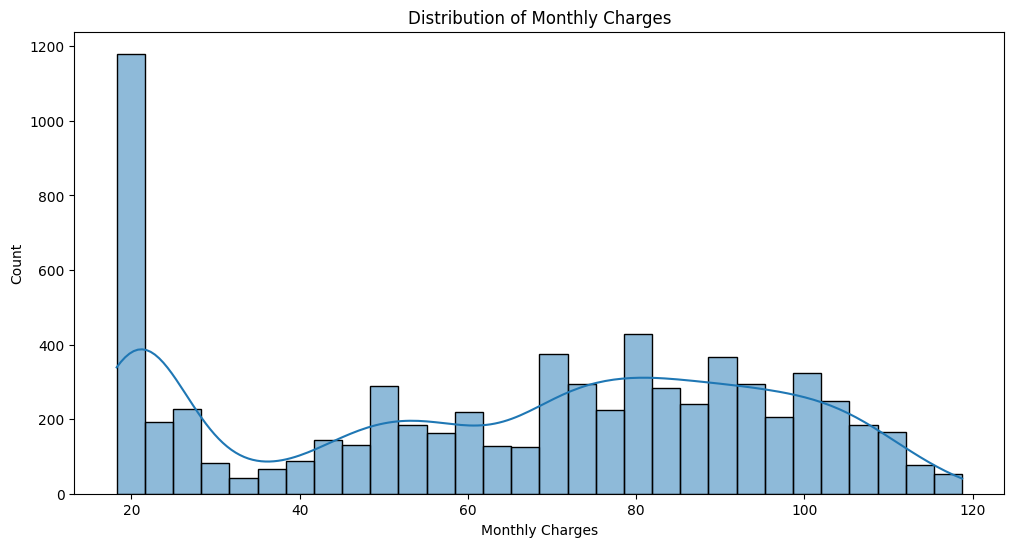

In [26]:
# Bar chart for tenure distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

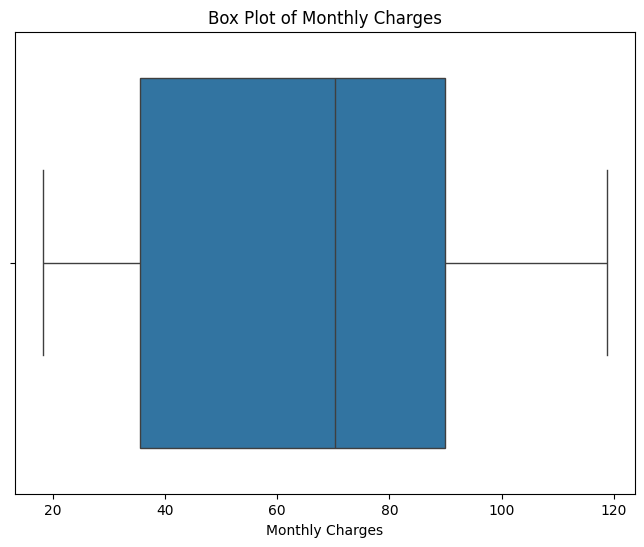

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Box Plot of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.show()

C:\Users\marin\AppData\Local\Temp\ipykernel_1824\4256042903.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('MonthlyCharges_bin')
C:\Users\marin\AppData\Local\Temp\ipykernel_1824\4256042903.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


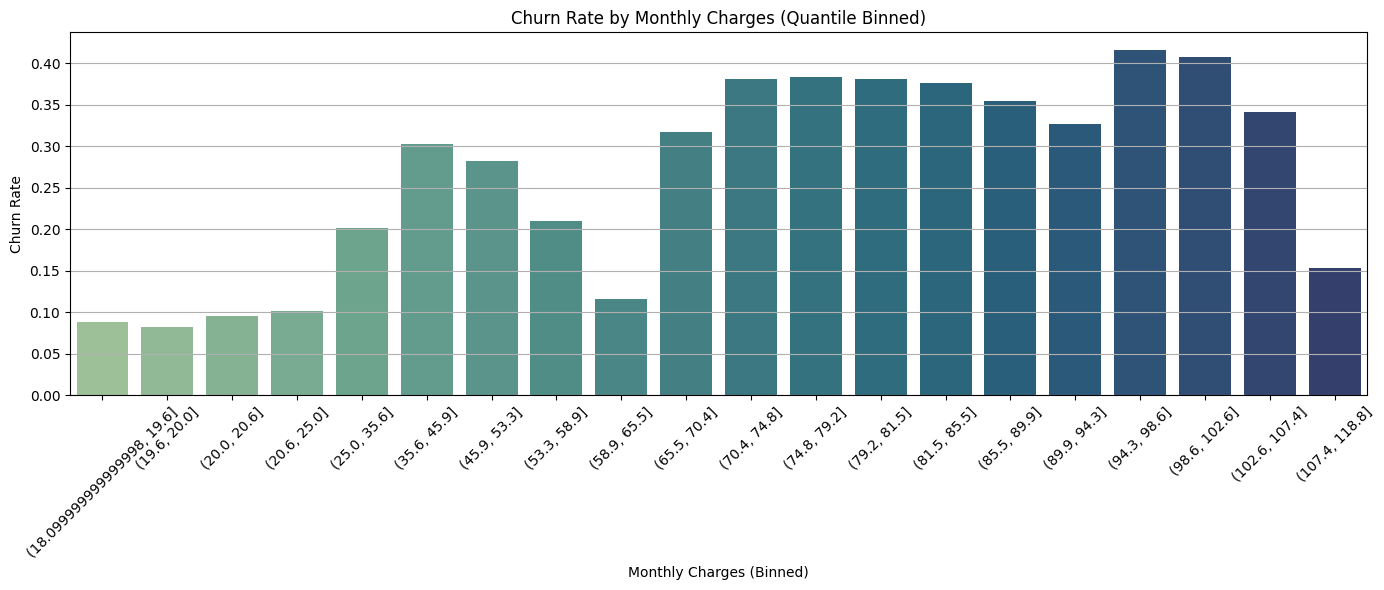

In [28]:
# Step 1: Ensure churn is numeric
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Step 2: Create quantile-based bins for MonthlyCharges
n_bins = 20  # You can change this to increase/decrease granularity
df['MonthlyCharges_bin'] = pd.qcut(df['MonthlyCharges'], q=n_bins, precision=0)

# Step 3: Group by MonthlyCharges_bin and calculate churn rate and customer count
monthly_bin_summary = (
    df.groupby('MonthlyCharges_bin')
    .agg(churn_rate=('Churn_binary', 'mean'),
         customer_count=('customerID', 'count'))
    .reset_index()
)

# Step 4: Sort bins in order (optional)
monthly_bin_summary['MonthlyCharges_bin'] = monthly_bin_summary['MonthlyCharges_bin'].astype(str)

# Step 5: Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=monthly_bin_summary,
    x='MonthlyCharges_bin',
    y='churn_rate',
    palette='crest'
)
plt.title('Churn Rate by Monthly Charges (Quantile Binned)')
plt.xlabel('Monthly Charges (Binned)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<h2>📈 Exploring Interaction Between Monthly Charges and Contract Type on Churn</h2>
<p>We analyze whether the effect of monthly charges on churn depends on the customer's contract type.</p>

<h2>📊 Churn Rate by Contract Type</h2>
<p>
Here, we examine how churn generally varies across different contract types. The bar chart shows that customers with <strong>Month-to-month contracts</strong> have a much higher churn rate compared to those with <strong>One Year</strong> or <strong>Two Year contracts</strong>.
</p>
<p>
This suggests that contract type is a strong indicator of churn. Customers on longer-term contracts are more likely to stay, likely due to commitment or cancellation fees.
</p>

C:\Users\marin\AppData\Local\Temp\ipykernel_1824\466091768.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=contract_churn, x='Contract', y='Churn_binary', palette='coolwarm')


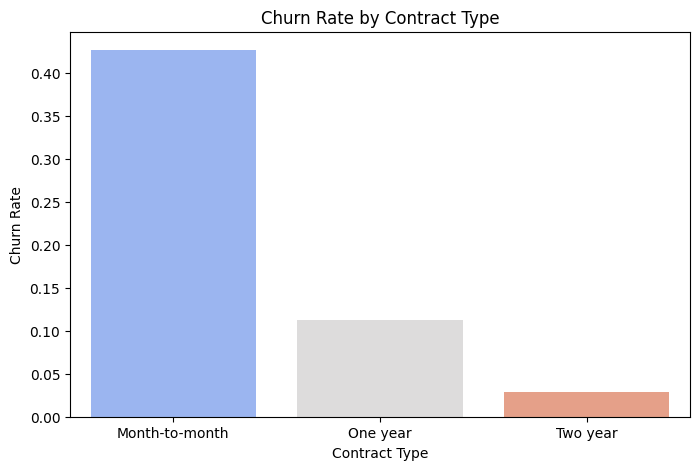

In [29]:
contract_churn = df.groupby('Contract')['Churn_binary'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=contract_churn, x='Contract', y='Churn_binary', palette='coolwarm')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()


<h3>💳 Monthly Charges by Contract Type and Churn</h3>
<p>
This box plot shows how <strong>Monthly Charges</strong> differ between customers who churned and those who stayed, across each <strong>Contract</strong> type.
</p>
<p>
We can see that churned customers tend to pay more on average, regardless of the contract type. However, the gap in monthly charges between churned and non-churned customers is larger for long-term contracts (One year and Two year). This suggests that pricing may be a stronger reason for churn among customers on longer contracts.
</p>

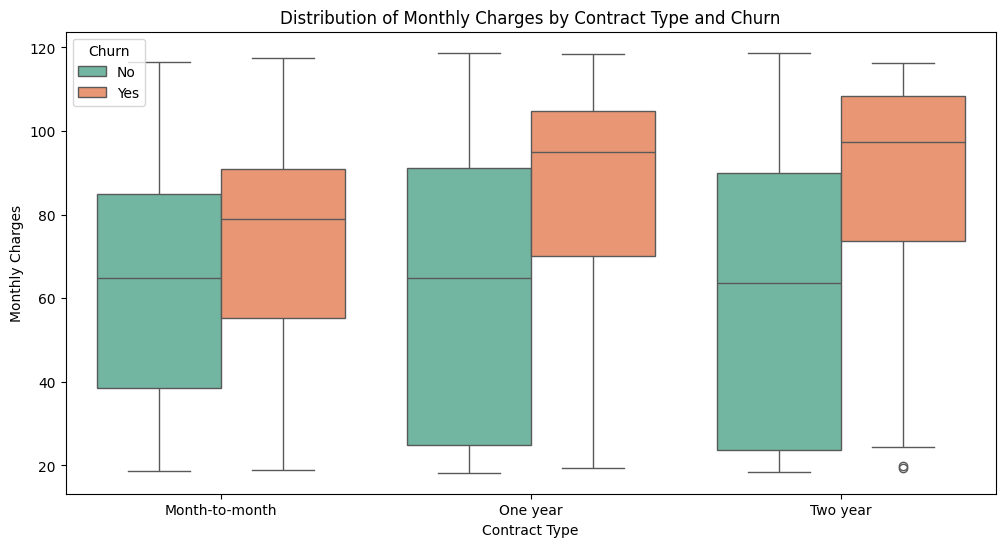

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df, 
    x='Contract', 
    y='MonthlyCharges', 
    hue='Churn', 
    palette='Set2'
)
plt.title('Distribution of Monthly Charges by Contract Type and Churn')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.show()


<h3>📊 Impact of Monthly Charges on Churn Within Each Contract Type</h3>
<p>This chart shows how churn rates vary by contract type and monthly charges. Customers with month-to-month contracts have the highest churn overall. However, for one-year and two-year contracts, churn increases more clearly as monthly charges go up. This suggests that price sensitivity is stronger among long-term contract customers.</p>

C:\Users\marin\AppData\Local\Temp\ipykernel_1824\224414701.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(


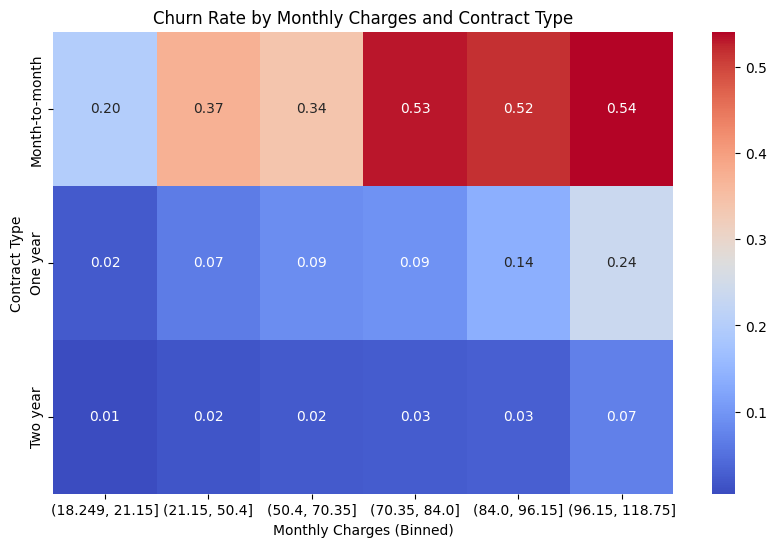

In [31]:
# Pivot table for heatmap
heatmap_data = df.pivot_table(
    index='Contract', 
    columns=pd.qcut(df['MonthlyCharges'], q=6), 
    values='Churn_binary', 
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Churn Rate by Monthly Charges and Contract Type')
plt.xlabel('Monthly Charges (Binned)')
plt.ylabel('Contract Type')
plt.show()


<h3>📊 Do Churned Customers Pay More Within Each Contract Type?</h3>
<p>We test whether churned customers have higher <strong>MonthlyCharges</strong> than non-churned customers within each contract type. Since the data is not normally distributed, we use the <strong>Mann–Whitney U Test</strong> with a one-sided alternative hypothesis.</p>
<p>The test is run separately for each contract type (<em>Month-to-Month</em>, <em>One Year</em>, <em>Two Year</em>), checking if churned customers tend to have higher monthly charges than those who stayed.</p>
<p>
The results show statistically significant differences in all three groups, indicating that churned customers typically pay more than non-churned customers — regardless of contract type.
</p>

In [32]:
# Contract types and directions for one-sided test
tests = {
    'Month-to-month': 'greater',
    'One year': 'greater',
    'Two year': 'greater'
}

# Run test for each contract type
for contract, direction in tests.items():
    print(f"\n🔍 Contract Type: {contract} | Test Direction: churned {direction} than not_churned")

    subset = df[df['Contract'] == contract]
    churned = subset[subset['Churn'] == 'Yes']['MonthlyCharges']
    not_churned = subset[subset['Churn'] == 'No']['MonthlyCharges']

    # Means
    mean_churned = churned.mean()
    mean_not_churned = not_churned.mean()
    print(f"Mean TotalCharges - Churned: {mean_churned:.2f}, Not Churned: {mean_not_churned:.2f}")

    # Mann–Whitney U Test (one-sided)
    stat, p = mannwhitneyu(churned, not_churned, alternative=direction)
    print(f"U-Statistic = {stat:.2f}, p-value = {p:.4f}")

    # Interpretation
    if p < 0.05:
        print("✅ Statistically significant difference in expected direction.")
    else:
        print("❌ No significant difference found in expected direction.")


🔍 Contract Type: Month-to-month | Test Direction: churned greater than not_churned
Mean TotalCharges - Churned: 73.02, Not Churned: 61.46
U-Statistic = 2278770.00, p-value = 0.0000
✅ Statistically significant difference in expected direction.

🔍 Contract Type: One year | Test Direction: churned greater than not_churned
Mean TotalCharges - Churned: 85.05, Not Churned: 62.54
U-Statistic = 153874.50, p-value = 0.0000
✅ Statistically significant difference in expected direction.

🔍 Contract Type: Two year | Test Direction: churned greater than not_churned
Mean TotalCharges - Churned: 86.78, Not Churned: 60.11
U-Statistic = 56414.50, p-value = 0.0000
✅ Statistically significant difference in expected direction.


<h3>📊 Hypothesis Testing on Monthly Charges by Contract Type for Churn customers</h3>
<p>We now test whether there are differences in <strong>MonthlyCharges</strong> among churned customers across different contract types. Using the <strong>Mann–Whitney U Test</strong>, we compare the groups pairwise.</p>
<ul>
    <li>✅ <strong>Hypothesis 1:</strong> Churned <em>Month-to-Month</em> customers have lower monthly charges than churned <em>One-Year</em> customers — Confirmed.</li>
    <li>✅ <strong>Hypothesis 2:</strong> Churned <em>Month-to-Month</em> customers have lower monthly charges than churned <em>Two-Year</em> customers — Confirmed.</li>
    <li>❌ <strong>Hypothesis 3:</strong> Churned <em>One-Year</em> and <em>Two-Year</em> customers have different monthly charges — Not supported by the data.</li>
</ul>


In [33]:
# Extract churned customers only
churned_df = df[df['Churn'] == 'Yes']

# Subsets by contract
m2m = churned_df[churned_df['Contract'] == 'Month-to-month']['MonthlyCharges']
one_year = churned_df[churned_df['Contract'] == 'One year']['MonthlyCharges']
two_year = churned_df[churned_df['Contract'] == 'Two year']['MonthlyCharges']

# Means
print("📊 Mean MonthlyCharges (Churned Customers Only):")
print(f"Month-to-Month: {m2m.mean():.2f}")
print(f"One Year:       {one_year.mean():.2f}")
print(f"Two Year:       {two_year.mean():.2f}")

# Test 1: M2M < One-Year
stat, p = mannwhitneyu(m2m, one_year, alternative='less')
print("\n🔍 Test: M2M < One-Year (MonthlyCharges)")
print(f"U-Statistic = {stat:.2f}, p-value = {p:.4f}")
print("✅ Significant difference (M2M < One-Year)" if p < 0.05 else "❌ Not significant")

# Test 2: M2M < Two-Year
stat, p = mannwhitneyu(m2m, two_year, alternative='less')
print("\n🔍 Test: M2M < Two-Year (MonthlyCharges)")
print(f"U-Statistic = {stat:.2f}, p-value = {p:.4f}")
print("✅ Significant difference (M2M < Two-Year)" if p < 0.05 else "❌ Not significant")

# Test 3: One-Year ≈ Two-Year (two-sided)
stat, p = mannwhitneyu(one_year, two_year, alternative='two-sided')
print("\n🔍 Test: One-Year ≈ Two-Year (MonthlyCharges)")
print(f"U-Statistic = {stat:.2f}, p-value = {p:.4f}")
print("✅ No significant difference" if p >= 0.05 else "❌ Significant difference")

📊 Mean MonthlyCharges (Churned Customers Only):
Month-to-Month: 73.02
One Year:       85.05
Two Year:       86.78

🔍 Test: M2M < One-Year (MonthlyCharges)
U-Statistic = 90808.00, p-value = 0.0000
✅ Significant difference (M2M < One-Year)

🔍 Test: M2M < Two-Year (MonthlyCharges)
U-Statistic = 23732.00, p-value = 0.0000
✅ Significant difference (M2M < Two-Year)

🔍 Test: One-Year ≈ Two-Year (MonthlyCharges)
U-Statistic = 3506.50, p-value = 0.2068
✅ No significant difference


<h2>📌 Conclusion: Contract Type and Monthly Charges Interaction</h2>
<p>
Contract type is a strong predictor of churn on its own, but its effect becomes even clearer when combined with Monthly Charges. While Monthly Charges alone didn’t show a strong trend, the combination of both features revealed important patterns.
</p>
<ul>
  <li>Churned customers have higher average Monthly Charges than non-churned customers within each contract type.</li>
  <li>Among churned customers, those on Month-to-Month contracts have lower Monthly Charges on average than those with One-Year or Two-Year contracts.</li>
</ul>

<h2>💵 Total Charges and Churn</h2>
<p>
We analyze the <code>TotalCharges</code> feature, which represents the total amount a customer has paid to date. We start by visualizing its distribution using a histogram and a box plot to understand its range and identify any potential outliers.
</p>
<p>
To explore how total charges relate to churn, we divide the values into quantile-based bins and calculate the churn rate for each bin. The final bar chart shows a clear trend: <strong>as total charges increase, the churn rate decreases</strong>.
</p>
<p>
This pattern suggests that long-term, high-paying customers are more likely to stay, making <code>TotalCharges</code> a useful predictor for churn.
</p>

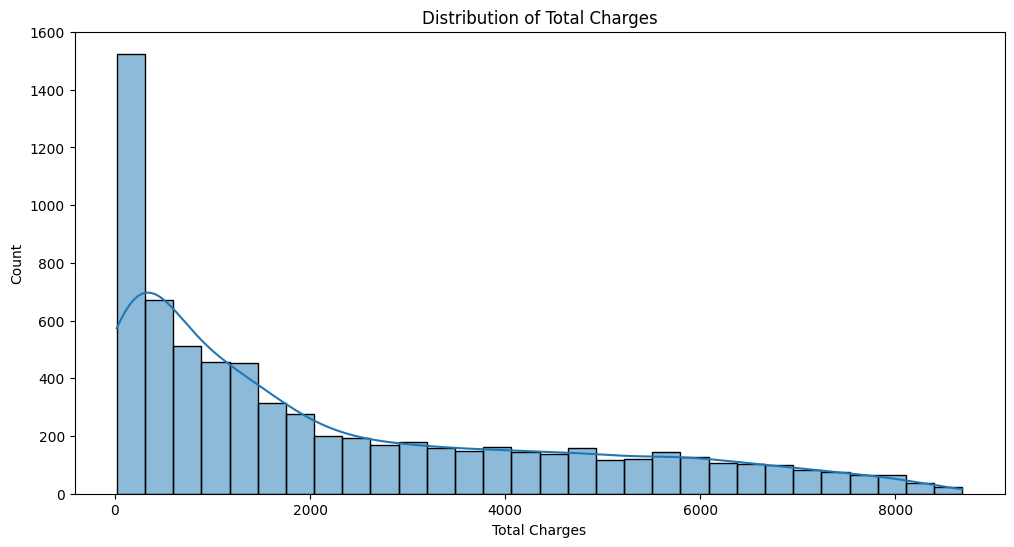

In [34]:
# Bar chart for tenure distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['TotalCharges'], bins=30, kde=True)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.show()

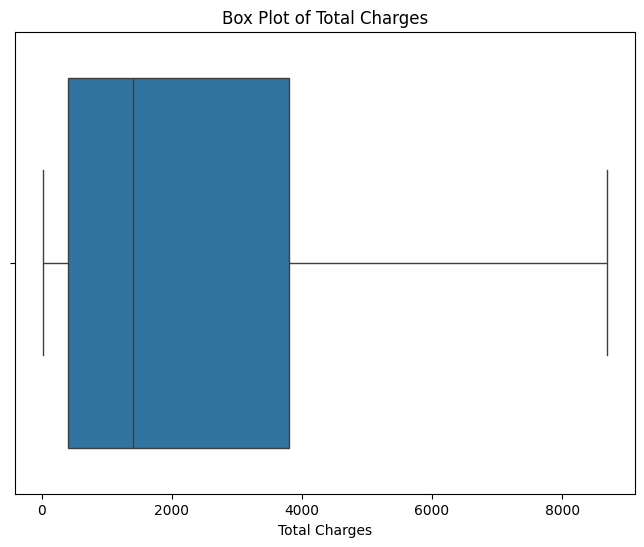

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TotalCharges'])
plt.title('Box Plot of Total Charges')
plt.xlabel('Total Charges')
plt.show()

C:\Users\marin\AppData\Local\Temp\ipykernel_1824\1895320997.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('TotalCharges_bin')
C:\Users\marin\AppData\Local\Temp\ipykernel_1824\1895320997.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


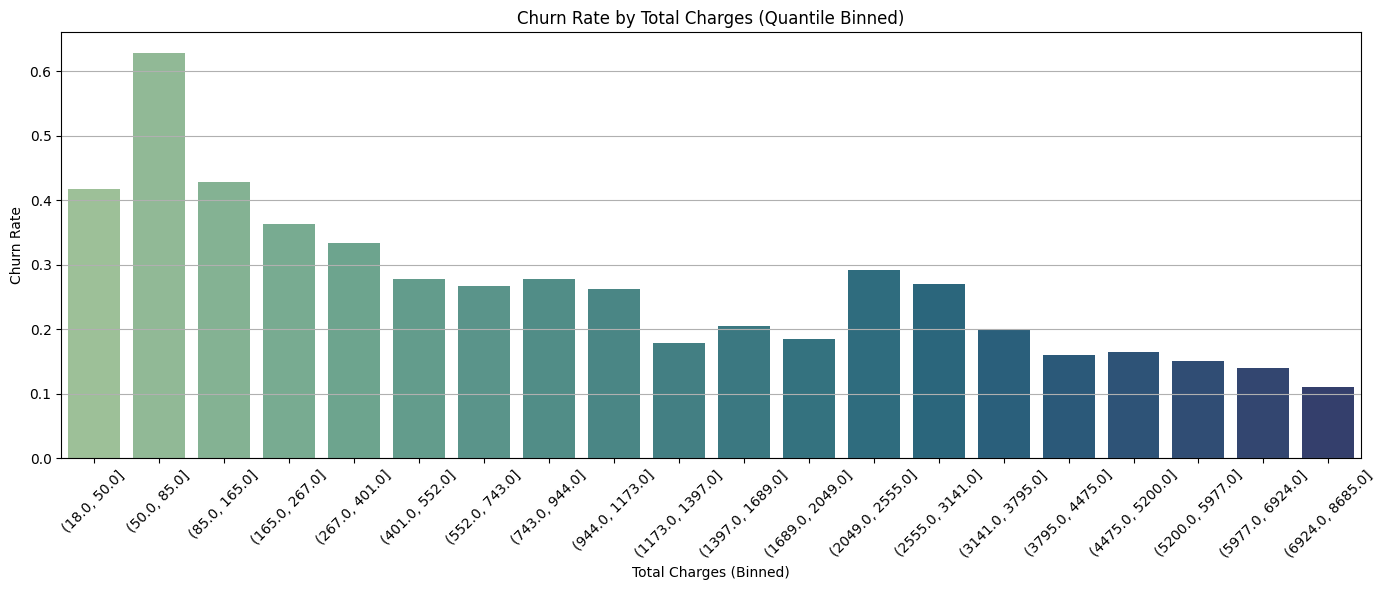

In [36]:
# Step 1: Ensure churn is numeric
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Step 2: Create quantile-based bins for TotalCharges
n_bins = 20  # You can change this to increase/decrease granularity
df['TotalCharges_bin'] = pd.qcut(df['TotalCharges'], q=n_bins, precision=0)

# Step 3: Group by MonthlyCharges_bin and calculate churn rate and customer count
total_bin_summary = (
    df.groupby('TotalCharges_bin')
    .agg(churn_rate=('Churn_binary', 'mean'),
         customer_count=('customerID', 'count'))
    .reset_index()
)

# Step 4: Sort bins in order (optional)
total_bin_summary['TotalCharges_bin'] = total_bin_summary['TotalCharges_bin'].astype(str)

# Step 5: Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=total_bin_summary,
    x='TotalCharges_bin',
    y='churn_rate',
    palette='crest'
)
plt.title('Churn Rate by Total Charges (Quantile Binned)')
plt.xlabel('Total Charges (Binned)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<h2>📉 Interaction Between Total Charges and Contract Type</h2>

<p>
From this visualization, we notice the following:
</p>
<ul>
  <li><strong>Month-to-month customers</strong> who churn tend to have low Total Charges — likely because they are newer customers who leave early.</li>
  <li><strong>Long-term contract customers</strong> who churn often have much higher Total Charges — these are loyal customers who eventually decide to leave.</li>
</ul>

<h4>💡 Business Insights</h4>
<ul>
  <li>New customers on monthly contracts may need better onboarding and early engagement to reduce quick churn.</li>
  <li>Long-term customers could benefit from loyalty programs or incentives to keep them from leaving after years of service.</li>
</ul>


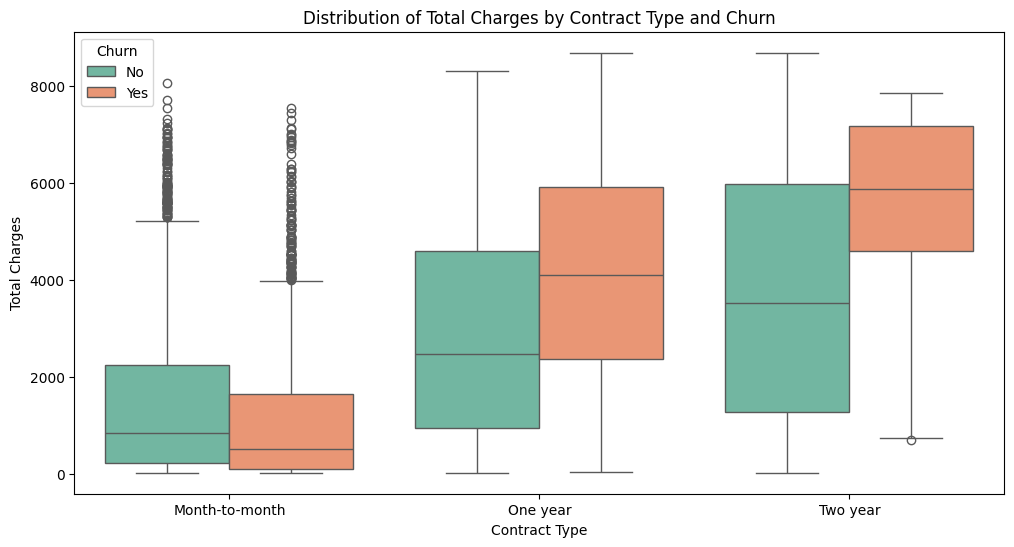

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df, 
    x='Contract', 
    y='TotalCharges', 
    hue='Churn', 
    palette='Set2'
)
plt.title('Distribution of Total Charges by Contract Type and Churn')
plt.xlabel('Contract Type')
plt.ylabel('Total Charges')
plt.show()


<h3>📈 Interaction Between Contract Type and Total Charges</h3>
<p>
This visualization reveals contrasting churn trends across contract types:
</p>
<ul>
  <li><strong>Month-to-Month Customers:</strong> There is a clear downtrend in churn rate as Total Charges increase. This suggests that early-stage customers are more likely to churn quickly, before experiencing the long-term value of the service. However, those who continue paying tend to become more loyal over time, possibly transitioning into long-term customers.</li>
  <li><strong>Long-Term Customers (One or Two-Year Contracts):</strong> An opposite trend emerges — churn rate increases with Total Charges. This could indicate that customers who have been loyal for a long time are more likely to churn once they reach a certain payment threshold. It may also reflect dissatisfaction among higher-paying customers (e.g., premium tiers or bundled plans) who no longer perceive enough value to renew their contracts.</li>
</ul>

<h4>💼 Business Implications</h4>
<ul>
  <li><strong>Early-Stage Customers:</strong> Focus retention efforts on the first few months of the customer journey. Providing value early — through onboarding, promotions, or personalized engagement — can help reduce early churn.</li>
  <li><strong>Long-Term Customers:</strong> Monitor satisfaction levels among high-value users. Offering loyalty rewards, tailored deals, or proactive outreach may help retain these customers before they hit the churn risk threshold.</li>
</ul>


C:\Users\marin\AppData\Local\Temp\ipykernel_1824\3262422367.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(


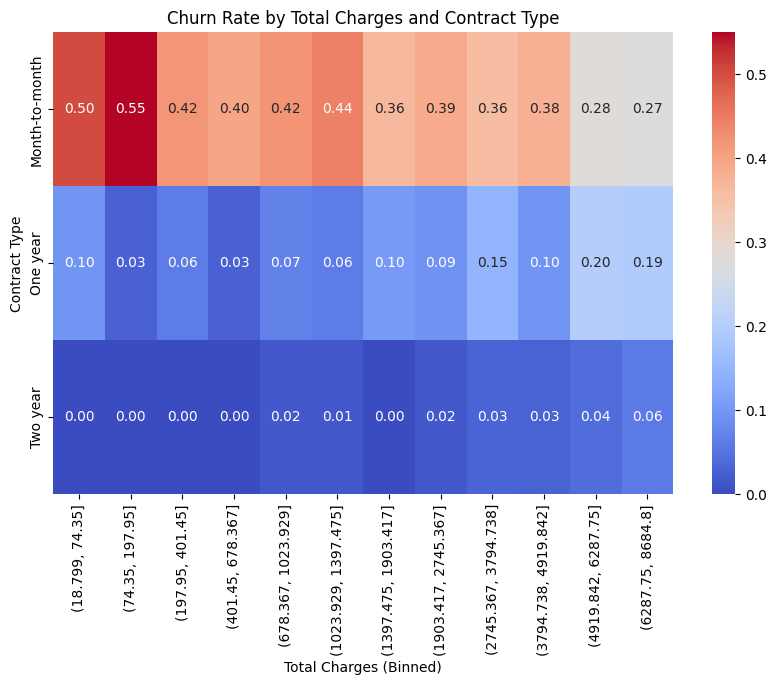

In [38]:
# Pivot table for heatmap
heatmap_data = df.pivot_table(
    index='Contract', 
    columns=pd.qcut(df['TotalCharges'], q=12), 
    values='Churn_binary', 
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Churn Rate by Total Charges and Contract Type')
plt.xlabel('Total Charges (Binned)')
plt.ylabel('Contract Type')
plt.show()


<h3>📊 Statistical Test: Comparing Total Charges by Contract Type</h3>
<p>
To statistically validate our earlier observations, we compare the <strong>TotalCharges</strong> across different contract types. Specifically, we test whether customers on <strong>Month-to-month contracts</strong> tend to have lower total charges than those on long-term contracts.
</p>
<p>
Since <code>TotalCharges</code> is not normally distributed (as confirmed during EDA), we use the non-parametric <strong>Mann–Whitney U Test</strong>. This test is appropriate for comparing two independent groups when the data is skewed or non-normal.
</p>
<p>
✅ The results confirm our hypotheses — customers with month-to-month contracts have significantly lower total charges, while long-term contract customers show higher totals. This supports the patterns we observed during exploratory analysis and reinforces the relationship between contract type and customer tenure/value.
</p>


In [39]:
# Contract types and directions for one-sided test
tests = {
    'Month-to-month': 'less',
    'One year': 'greater',
    'Two year': 'greater'
}

# Run test for each contract type
for contract, direction in tests.items():
    print(f"\n🔍 Contract Type: {contract} | Test Direction: churned {direction} than not_churned")

    subset = df[df['Contract'] == contract]
    churned = subset[subset['Churn'] == 'Yes']['TotalCharges']
    not_churned = subset[subset['Churn'] == 'No']['TotalCharges']

    # Means
    mean_churned = churned.mean()
    mean_not_churned = not_churned.mean()
    print(f"Mean TotalCharges - Churned: {mean_churned:.2f}, Not Churned: {mean_not_churned:.2f}")

    # Mann–Whitney U Test (one-sided)
    stat, p = mannwhitneyu(churned, not_churned, alternative=direction)
    print(f"U-Statistic = {stat:.2f}, p-value = {p:.4f}")

    # Interpretation
    if p < 0.05:
        print("✅ Statistically significant difference in expected direction.")
    else:
        print("❌ No significant difference found in expected direction.")



🔍 Contract Type: Month-to-month | Test Direction: churned less than not_churned
Mean TotalCharges - Churned: 1164.46, Not Churned: 1521.93
U-Statistic = 1577513.50, p-value = 0.0000
✅ Statistically significant difference in expected direction.

🔍 Contract Type: One year | Test Direction: churned greater than not_churned
Mean TotalCharges - Churned: 4066.21, Not Churned: 2903.57
U-Statistic = 140657.50, p-value = 0.0000
✅ Statistically significant difference in expected direction.

🔍 Contract Type: Two year | Test Direction: churned greater than not_churned
Mean TotalCharges - Churned: 5432.36, Not Churned: 3678.99
U-Statistic = 54257.00, p-value = 0.0000
✅ Statistically significant difference in expected direction.


<h3>Logistic Regression with Interaction</h3>
<p>
A logistic regression model is trained to predict churn using <code>TotalCharges</code>, <code>Contract</code>, and their interaction:<br>
<code>Churn_binary ~ TotalCharges * Contract</code>
</p>

<h4>📋 Output Summary:</h4>
<ul>
  <li>Baseline contract: <strong>Month-to-Month</strong></li>
  <li><strong>TotalCharges coefficient</strong> (-0.0001): For Month-to-Month, higher charges slightly reduce churn.</li>
  <li><strong>Contract coefficients</strong> (One year: -2.74, Two year: -4.68): Lower baseline churn risk for long-term contracts.</li>
  <li><strong>Interaction terms</strong> (both +0.0004): In One-Year and Two-Year contracts, higher TotalCharges increase churn risk.</li>
</ul>

<h4>📌 Conclusion:</h4>
<ul>
  <li>All coefficients are statistically significant (p &lt; 0.001).</li>
  <li>Interaction terms confirm that the effect of TotalCharges differs by contract type.</li>
  <li>This model supports including interaction terms for better churn prediction.</li>
</ul>


In [40]:
# Let's assume you clean/prepare TotalCharges already
model = smf.logit(
    formula="Churn_binary ~ TotalCharges * Contract", 
    data=df[df['TotalCharges'].notnull()]
).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.473141
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           Churn_binary   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7026
Method:                           MLE   Df Model:                            5
Date:                Sat, 22 Mar 2025   Pseudo R-squ.:                  0.1829
Time:                        23:24:49   Log-Likelihood:                -3327.1
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.1023      0.043     -2

<h3>Compare Models With and Without Interaction</h3>
<p>
We build two logistic regression models:
<ul>
  <li><strong>Simple model</strong>: only uses <code>TotalCharges</code> and <code>Contract</code></li>
  <li><strong>Interaction model</strong>: also includes the interaction between <code>TotalCharges</code> and <code>Contract</code></li>
</ul>
We compare the models using:
<ul>
  <li><strong>Pseudo R²</strong> – higher means better fit</li>
  <li><strong>Likelihood Ratio Test (LLR)</strong> – checks if the interaction model is significantly better</li>
</ul>
<p>
The results show that the interaction model fits the data better (higher Pseudo R² and p-value = 0.0000).
</p>
<p>Below we'll do the same analysis for Monthly Charges which leads to the same conclusion.</p>

In [41]:
from scipy.stats import chi2

In [42]:
# Base model: without interaction
model_simple = smf.logit(
    formula="Churn_binary ~ TotalCharges + Contract",
    data=df
).fit()

# Full model: with interaction
model_interact = smf.logit(
    formula="Churn_binary ~ TotalCharges * Contract",
    data=df
).fit()

# Compare pseudo R²
print("\n📊 Model Comparison:")
print(f"Simple model Pseudo R²: {model_simple.prsquared:.4f}")
print(f"Interaction model Pseudo R²: {model_interact.prsquared:.4f}")

# Likelihood Ratio Test
LLR = 2 * (model_interact.llf - model_simple.llf)
p_value = chi2.sf(LLR, df=2)  # 2 extra interaction terms

print(f"\n🔬 Likelihood Ratio Test (LLR): {LLR:.2f}, p-value: {p_value:.4f}")


Optimization terminated successfully.
         Current function value: 0.480689
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.473141
         Iterations 8

📊 Model Comparison:
Simple model Pseudo R²: 0.1698
Interaction model Pseudo R²: 0.1829

🔬 Likelihood Ratio Test (LLR): 106.15, p-value: 0.0000


In [43]:
# Base model: without interaction
model_simple = smf.logit(
    formula="Churn_binary ~ MonthlyCharges + Contract",
    data=df
).fit()

# Full model: with interaction
model_interact = smf.logit(
    formula="Churn_binary ~ MonthlyCharges * Contract",
    data=df
).fit()

# Compare pseudo R²
print("\n📊 Model Comparison:")
print(f"Simple model Pseudo R²: {model_simple.prsquared:.4f}")
print(f"Interaction model Pseudo R²: {model_interact.prsquared:.4f}")

# Likelihood Ratio Test
LLR = 2 * (model_interact.llf - model_simple.llf)
p_value = chi2.sf(LLR, df=2)  # 2 extra interaction terms

print(f"\n🔬 Likelihood Ratio Test (LLR): {LLR:.2f}, p-value: {p_value:.4f}")

Optimization terminated successfully.
         Current function value: 0.461004
         Iterations 8


Optimization terminated successfully.
         Current function value: 0.460292
         Iterations 9

📊 Model Comparison:
Simple model Pseudo R²: 0.2038
Interaction model Pseudo R²: 0.2051

🔬 Likelihood Ratio Test (LLR): 10.01, p-value: 0.0067
